In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [6]:
df_US = df[df['job_country'] == 'United States']
df_DE = df[df['job_country'] == 'Germany']
df_skills_US = df_US.explode('job_skills')
df_skills_DE = df_DE.explode('job_skills')

In [10]:
# Skill Count Analysis
df_skills_US_count = df_skills_US.groupby(['job_skills', 'job_title_short']).size()
df_skills_US_count = df_skills_US_count.reset_index(name='skill_count')
df_skills_US_count.sort_values(by='skill_count', ascending=False, inplace=True)



df_skills_DE_count = df_skills_DE.groupby(['job_skills', 'job_title_short']).size()
df_skills_DE_count = df_skills_DE_count.reset_index(name='skill_count')
df_skills_DE_count.sort_values(by='skill_count', ascending=False, inplace=True)


,job_skills,job_title_short,skill_count
907,python,Data Scientist,4157
906,python,Data Engineer,3524
1139,sql,Data Engineer,3145
1138,sql,Data Analyst,2947
905,python,Data Analyst,2309
...,...,...,...
1377,zoom,Machine Learning Engineer,1
26,angular,Senior Data Scientist,1
12,alteryx,Cloud Engineer,1
1380,zoom,Senior Data Scientist,1


In [36]:
# Preparation for Double Graph
job_titles_US = df_skills_US_count['job_title_short'].value_counts().index[:3].tolist()  # Top 3 in the USA
job_titles_DE = df_skills_DE_count['job_title_short'].value_counts().index[:3].tolist()  # Top 3 in Germany

C:\Users\User\AppData\Local\Temp\ipykernel_30992\1564556580.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\User\AppData\Local\Temp\ipykernel_30992\1564556580.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\User\AppData\Local\Temp\ipykernel_30992\1564556580.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\User\AppData\Local\Temp\ipykernel_30992\1564556580.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` 

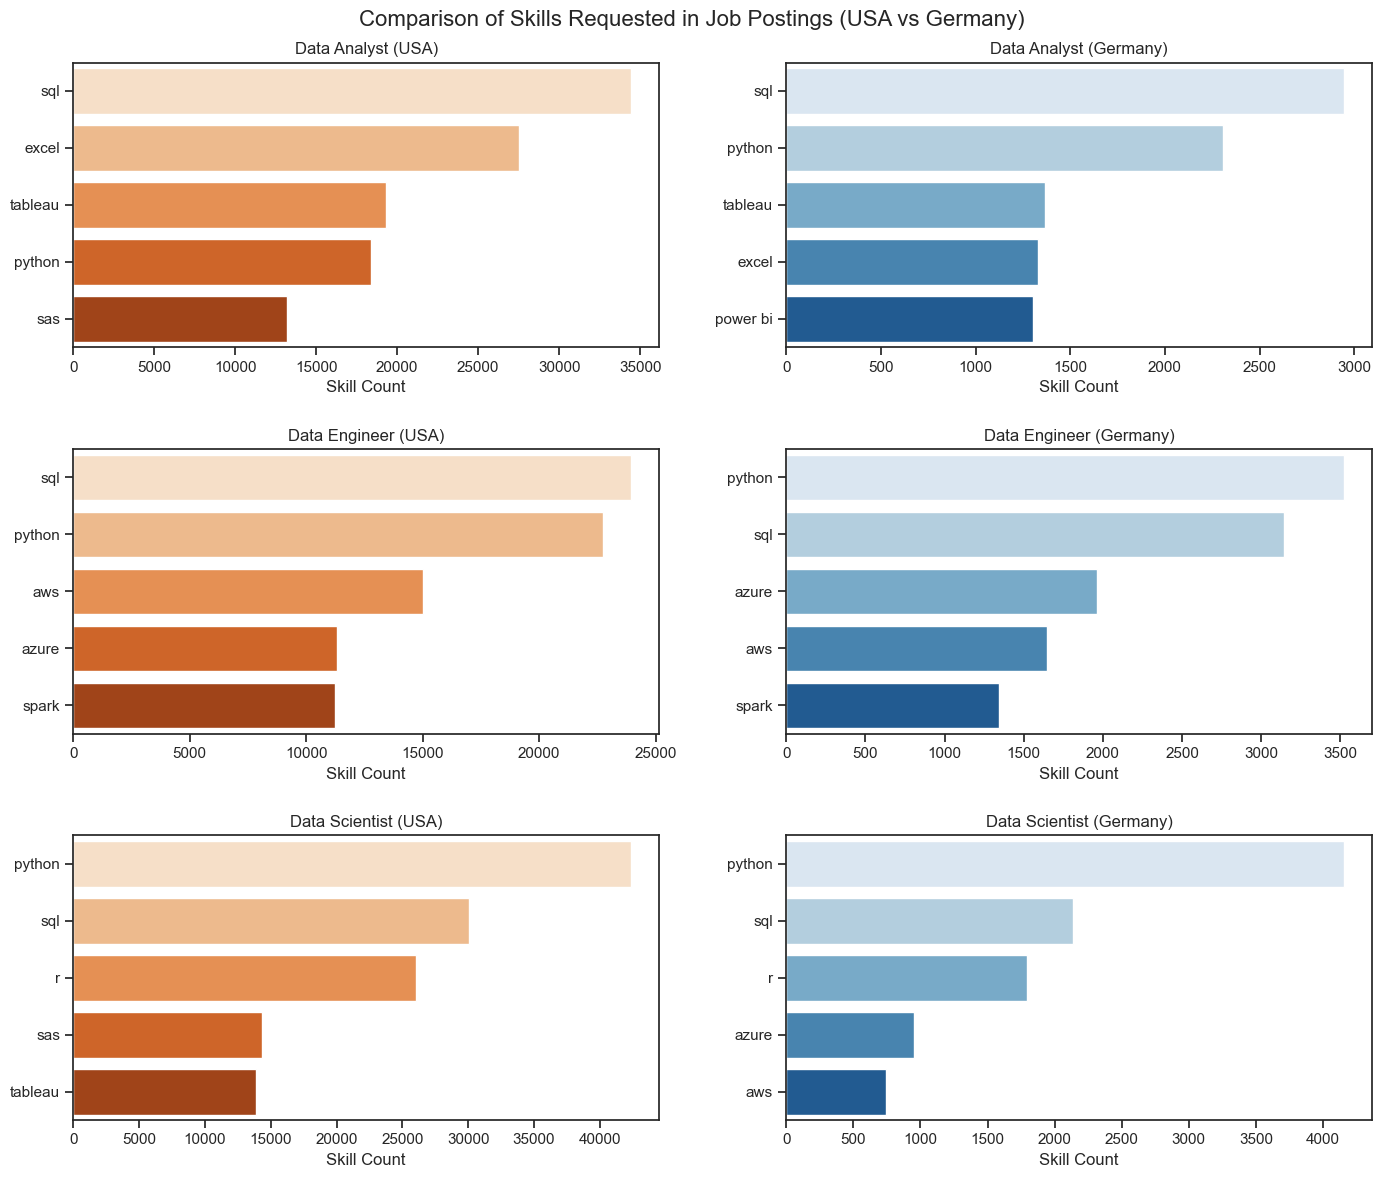

In [28]:
# Corrected Code for Side-by-Side Skill Count Comparison with Dark-to-Light Gradient at the Top
fig, axes = plt.subplots(len(job_titles), 2, figsize=(14, 12))

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    # USA Skill Count
    df_US_plot = df_skills_US_count[df_skills_US_count['job_title_short'] == job_title].head(5)[::-1]
    palette_US = sns.color_palette("Oranges", len(df_US_plot))  # Gradient from dark to light
    sns.barplot(
        data=df_US_plot,
        x='skill_count',
        y='job_skills',
        ax=axes[i, 0],
        palette=palette_US[::-1]  # Reverse palette to start with dark at the top
    )
    axes[i, 0].set_title(f"{job_title} (USA)")
    axes[i, 0].invert_yaxis()
    axes[i, 0].set_ylabel('')
    axes[i, 0].set_xlabel('Skill Count')

    # Germany Skill Count
    df_DE_plot = df_skills_DE_count[df_skills_DE_count['job_title_short'] == job_title].head(5)[::-1]
    palette_DE = sns.color_palette("Blues", len(df_DE_plot))  # Gradient from dark to light
    sns.barplot(
        data=df_DE_plot,
        x='skill_count',
        y='job_skills',
        ax=axes[i, 1],
        palette=palette_DE[::-1]  # Reverse palette to start with dark at the top
    )
    axes[i, 1].set_title(f"{job_title} (Germany)")
    axes[i, 1].invert_yaxis()
    axes[i, 1].set_ylabel('')
    axes[i, 1].set_xlabel('Skill Count')

fig.suptitle('Comparison of Skills Requested in Job Postings (USA vs Germany)', fontsize=16)
fig.tight_layout(h_pad=2, w_pad=3)  # Adjust padding between plots
plt.show()



C:\Users\User\AppData\Local\Temp\ipykernel_30992\811153167.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\User\AppData\Local\Temp\ipykernel_30992\811153167.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\User\AppData\Local\Temp\ipykernel_30992\811153167.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\User\AppData\Local\Temp\ipykernel_30992\811153167.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and 

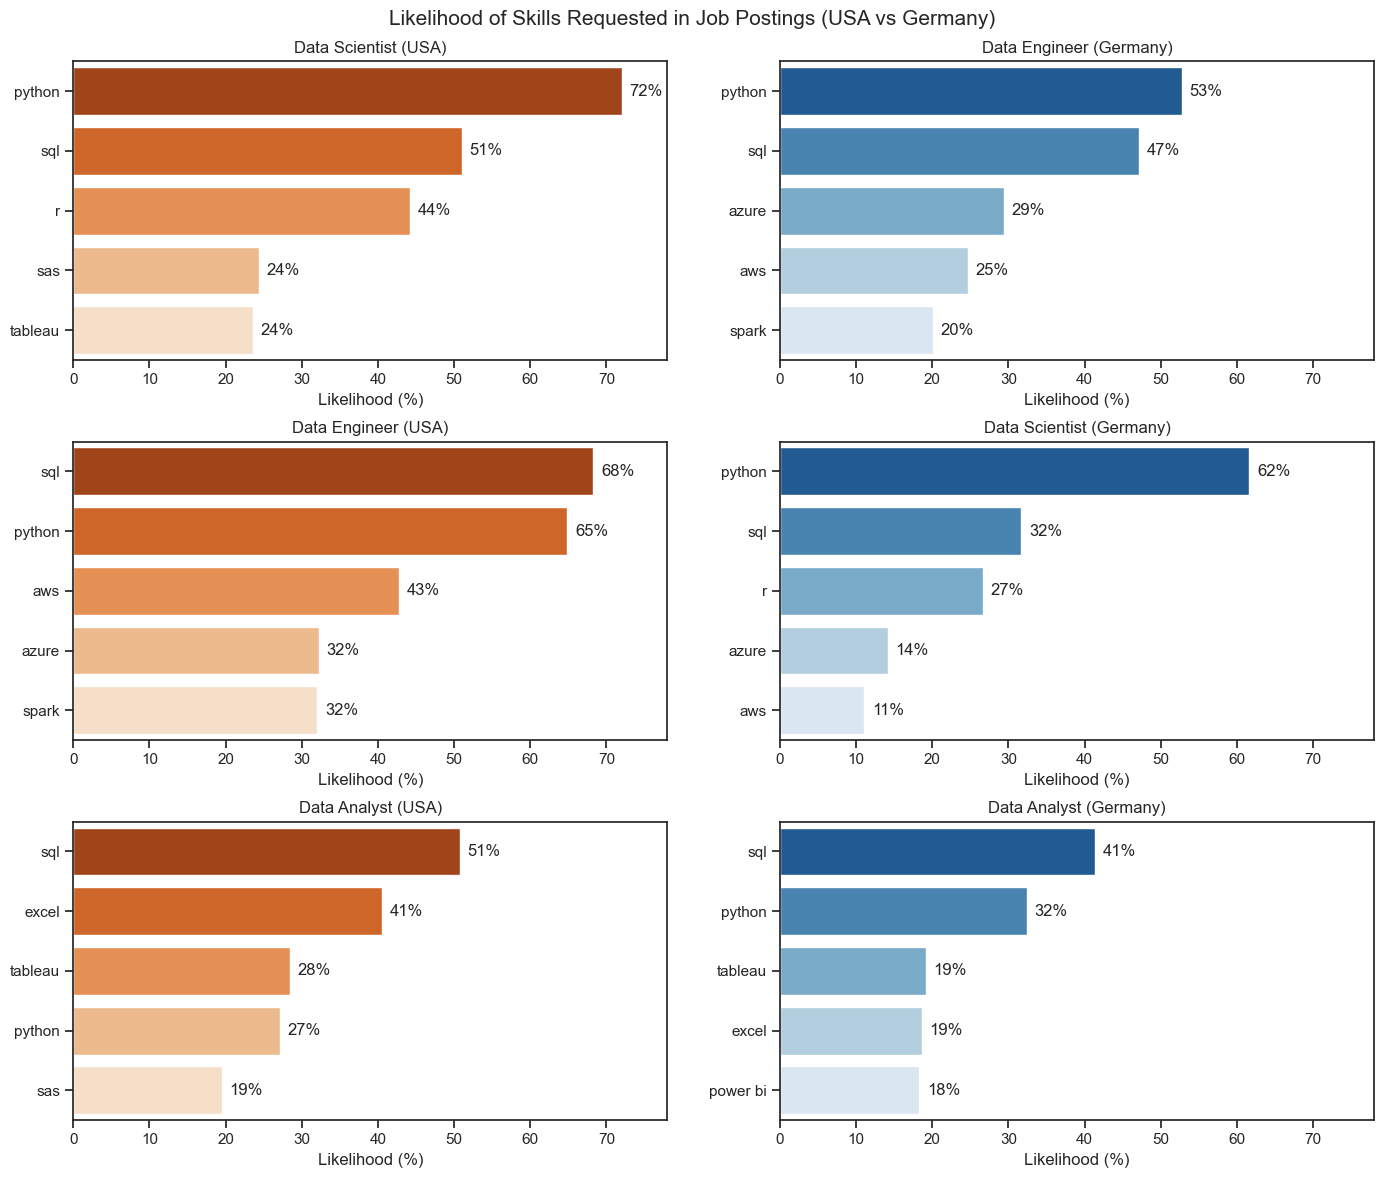

In [ ]:
# Side-by-Side Comparison for USA and Germany with Percentage Labels
max_rows = max(len(job_titles_US), len(job_titles_DE))
fig, axes = plt.subplots(max_rows, 2, figsize=(14, 4 * max_rows))  # Adjust figure size dynamically

for i in range(max_rows):
    # Handle USA Job Titles
    if i < len(job_titles_US):
        job_title = job_titles_US[i]
        df_US_plot = df_skills_perc_US[df_skills_perc_US['job_title_short'] == job_title].head(5)
        sns.barplot(
            data=df_US_plot,
            x='skill_percent',
            y='job_skills',
            ax=axes[i, 0],
            palette='Oranges_r'  # Set palette to orange for USA
        )
        axes[i, 0].set_title(f"{job_title} (USA)")
        axes[i, 0].set_ylabel('')
        axes[i, 0].set_xlabel('Likelihood (%)')
        axes[i, 0].set_xlim(0, 78)

        # Add percentage labels to USA bars
        for n, v in enumerate(df_US_plot['skill_percent']):
            axes[i, 0].text(v + 1, n, f'{v:.0f}%', va='center')
    else:
        axes[i, 0].axis('off')  # Turn off unused subplot

    # Handle Germany Job Titles
    if i < len(job_titles_DE):
        job_title = job_titles_DE[i]
        df_DE_plot = df_skills_perc_DE[df_skills_perc_DE['job_title_short'] == job_title].head(5)
        sns.barplot(
            data=df_DE_plot,
            x='skill_percent',
            y='job_skills',
            ax=axes[i, 1],
            palette='Blues_r'  # Set palette to blue for Germany
        )
        axes[i, 1].set_title(f"{job_title} (Germany)")
        axes[i, 1].set_ylabel('')
        axes[i, 1].set_xlabel('Likelihood (%)')
        axes[i, 1].set_xlim(0, 78)

        # Add percentage labels to Germany bars
        for n, v in enumerate(df_DE_plot['skill_percent']):
            axes[i, 1].text(v + 1, n, f'{v:.0f}%', va='center')
    else:
        axes[i, 1].axis('off')  # Turn off unused subplot

# Adjust layout with tight layout
fig.suptitle('Likelihood of Skills Requested in Job Postings (USA vs Germany)', fontsize=15)
fig.tight_layout(h_pad=0.8, w_pad=2.5)  # Adjust spacing between plots
plt.show()
